# IMPORTACION DE DATOS


In [3]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('datos_limon_final.csv')


# Mostrar las primeras filas del dataframe
print(df.head())

       Fechas  Trimestre   Año    Mes  Día Estación Precios Bolsa  \
0  2022-01-01          1  2022  enero    1   verano          1.19   
1  2022-01-02          1  2022  enero    2   verano          1.19   
2  2022-01-03          1  2022  enero    3   verano          1.25   
3  2022-01-04          1  2022  enero    4   verano          1.22   
4  2022-01-05          1  2022  enero    5   verano          1.22   

  Precios Caja Temp Max Temp Min Humedad Precipitaciones  \
0         1.47     31.7     21.2     NaN               0   
1         1.47     31.9     21.5     NaN             NaN   
2         1.58     32.9     21.1     NaN             NaN   
3          1.5     32.9       20     NaN             NaN   
4          1.5     32.2     20.6     NaN             NaN   

   Masa ingreso Bolsa(T)  Masa ingreso Caja(T)  Incendio Forestal  \
0                    NaN                   NaN                  0   
1                    NaN                   NaN                  0   
2                

# ESTANDARIZACIÓN DE DATOS

In [4]:
#revisamos las columnas para poder asegurar de convertirlas a números
df.dtypes

,0
Fechas,object
Trimestre,int64
Año,int64
Mes,object
Día,int64
Estación,object
Precios Bolsa,object
Precios Caja,object
Temp Max,object
Temp Min,object


In [5]:
#Eliminacion la columna Fechas dado que la informacion ya fue separada
df = df.drop(columns=['Fechas'])
#corregimos todos los puntos y los pasamos a , para despues convetir a números
df['Precios Bolsa'] = df['Precios Bolsa'].str.replace(',', '.')
df['Precios Caja'] = df['Precios Caja'].str.replace(',', '.')
df['Temp Max'] = df['Temp Max'].str.replace(',', '.')
df['Temp Min'] = df['Temp Min'].str.replace(',', '.')
df['Humedad'] = df['Humedad'].str.replace(',', '.')
df['Precipitaciones'] = df['Precipitaciones'].str.replace(',','.')


In [6]:
df['Precios Bolsa'] = pd.to_numeric(df['Precios Bolsa'])
df['Precios Caja'] = pd.to_numeric(df['Precios Caja'])
df['Temp Max'] = pd.to_numeric(df['Temp Max'])
df['Temp Min'] = pd.to_numeric(df['Temp Min'])
df['Humedad'] = pd.to_numeric(df['Humedad'])
df['Precipitaciones'] = pd.to_numeric(df['Precipitaciones'])
df.dtypes

,0
Trimestre,int64
Año,int64
Mes,object
Día,int64
Estación,object
Precios Bolsa,float64
Precios Caja,float64
Temp Max,float64
Temp Min,float64
Humedad,float64


In [7]:
df.describe()

,Trimestre,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Masa ingreso Caja(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño
count,1096.000000,1096.000000,1096.000000,1094.000000,1094.000000,1091.000000,1088.000000,911.000000,953.000000,595.000000,438.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2.508212,2023.000912,15.732664,2.296298,2.513464,31.392759,20.379283,71.526345,0.761280,357.398319,77.488584,0.028285,0.221715,0.163321,0.071168,0.275547
std,1.117697,0.817055,8.805388,1.811040,1.846866,2.563959,2.791129,5.337723,5.978503,320.154962,82.904531,0.165861,0.415590,0.369827,0.257222,0.446994
min,1.000000,2022.000000,1.000000,0.940000,1.090000,24.200000,14.200000,57.600000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2022.000000,8.000000,1.322500,1.520000,29.400000,17.800000,68.050000,0.000000,74.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2023.000000,16.000000,1.720000,1.900000,31.400000,20.600000,71.700000,0.000000,258.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2024.000000,23.000000,2.330000,2.595000,33.100000,22.600000,74.700000,0.000000,607.000000,99.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,2024.000000,31.000000,12.110000,12.500000,38.400000,26.600000,91.600000,94.500000,1354.000000,503.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CORRECCION DE VALORES VACIOS

In [8]:
# Porcentaje de nulos
null_pct = (df.isna().sum() / len(df)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)

\nPorcentaje de nulos por columna (%):
Masa ingreso Caja(T)     60.036496
Masa ingreso Bolsa(T)    45.711679
Humedad                  16.879562
Precipitaciones          13.047445
Temp Min                  0.729927
Temp Max                  0.456204
Precios Caja              0.182482
Precios Bolsa             0.182482
Año                       0.000000
Trimestre                 0.000000
Día                       0.000000
Mes                       0.000000
Estación                  0.000000
Incendio Forestal         0.000000
Lluvias Intensas          0.000000
Inundacion                0.000000
Huaico                    0.000000
Fenomeno_Niño             0.000000
dtype: float64


In [9]:
#Para conversar mejor los datos posibles se va a completar para todos
#los datos de las columnas: Precios Caja, Precios Bolsa, Temp Min, Temp Max,
#Precipitaciones, Humedad y Masa ingreso Bolsa(T) se completan con los valores promedios
df['Precios Bolsa'].fillna(df['Precios Bolsa'].mean(), inplace=True)
df['Precios Caja'].fillna(df['Precios Caja'].mean(), inplace=True)
df['Temp Min'].fillna(df['Temp Min'].mean(), inplace=True)
df['Temp Max'].fillna(df['Temp Max'].mean(), inplace=True)
df['Precipitaciones'].fillna(df['Precipitaciones'].mean(), inplace=True)
df['Humedad'].fillna(df['Humedad'].mean(), inplace=True)
df['Masa ingreso Bolsa(T)'].fillna(df['Masa ingreso Bolsa(T)'].mean(), inplace=True)

/tmp/ipython-input-986505004.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precios Bolsa'].fillna(df['Precios Bolsa'].mean(), inplace=True)
/tmp/ipython-input-986505004.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [10]:
df.drop(columns=['Masa ingreso Caja(T)'], inplace=True)

In [11]:
#Revision de valores nulos posterior a inserción de datos de nulos
null_pct = (df.isna().sum() / len(df)).sort_values(ascending=False) * 100
print("\\nPorcentaje de nulos por columna (%):")
print(null_pct)

\nPorcentaje de nulos por columna (%):
Trimestre                0.0
Año                      0.0
Mes                      0.0
Día                      0.0
Estación                 0.0
Precios Bolsa            0.0
Precios Caja             0.0
Temp Max                 0.0
Temp Min                 0.0
Humedad                  0.0
Precipitaciones          0.0
Masa ingreso Bolsa(T)    0.0
Incendio Forestal        0.0
Lluvias Intensas         0.0
Inundacion               0.0
Huaico                   0.0
Fenomeno_Niño            0.0
dtype: float64


# CODIFICACION DE CATEGORIAS DE TIEMPOS
La mejor combinación de codificación para poder reducir la correlacion entre variables y aprovechar los datos de la mejor posible es:
  - Meses: codificación ciclica
  - Estacion: one hot encoding
  - Trimestre: one hot encoding

In [12]:
#Codificacion inicial del mes
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Mapear la columna 'Mes' a números usando el diccionario
df['Mes_numerico'] = df['Mes'].map(meses)


In [13]:
df.head()

,Trimestre,Año,Mes,Día,Estación,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,Mes_numerico
0,1,2022,enero,1,verano,1.19,1.47,31.7,21.2,71.526345,0.00000,357.398319,0,0,0,0,0,1
1,1,2022,enero,2,verano,1.19,1.47,31.9,21.5,71.526345,0.76128,357.398319,0,0,0,0,0,1
2,1,2022,enero,3,verano,1.25,1.58,32.9,21.1,71.526345,0.76128,357.398319,0,0,0,0,0,1
3,1,2022,enero,4,verano,1.22,1.50,32.9,20.0,71.526345,0.76128,357.398319,0,0,0,0,0,1
4,1,2022,enero,5,verano,1.22,1.50,32.2,20.6,71.526345,0.76128,357.398319,0,0,0,0,0,1


In [14]:
#Eliminacion de columna original para dejar columna codificada
df.drop(columns=['Mes'], inplace=True)

In [15]:
df.head()

,Trimestre,Año,Día,Estación,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,Mes_numerico
0,1,2022,1,verano,1.19,1.47,31.7,21.2,71.526345,0.00000,357.398319,0,0,0,0,0,1
1,1,2022,2,verano,1.19,1.47,31.9,21.5,71.526345,0.76128,357.398319,0,0,0,0,0,1
2,1,2022,3,verano,1.25,1.58,32.9,21.1,71.526345,0.76128,357.398319,0,0,0,0,0,1
3,1,2022,4,verano,1.22,1.50,32.9,20.0,71.526345,0.76128,357.398319,0,0,0,0,0,1
4,1,2022,5,verano,1.22,1.50,32.2,20.6,71.526345,0.76128,357.398319,0,0,0,0,0,1


In [16]:
#Datos unicos de estacion
df['Estación'].unique()

array(['verano', 'otoño', 'invierno', 'primavera'], dtype=object)

In [17]:
#One hot encoding
df = pd.get_dummies(df, columns=['Estación','Trimestre'])

In [18]:
df.dtypes

,0
Año,int64
Día,int64
Precios Bolsa,float64
Precios Caja,float64
Temp Max,float64
Temp Min,float64
Humedad,float64
Precipitaciones,float64
Masa ingreso Bolsa(T),float64
Incendio Forestal,int64


In [19]:
#Codificacion ciclica empleando seno y coseno del mes dado su periodicidad
df['mes_sin'] = np.sin(2 * np.pi * df['Mes_numerico'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['Mes_numerico'] / 12)
df.drop(columns=['Mes_numerico'],inplace=True)

print(df)

       Año  Día  Precios Bolsa  Precios Caja  Temp Max  Temp Min    Humedad  \
0     2022    1           1.19          1.47      31.7      21.2  71.526345   
1     2022    2           1.19          1.47      31.9      21.5  71.526345   
2     2022    3           1.25          1.58      32.9      21.1  71.526345   
3     2022    4           1.22          1.50      32.9      20.0  71.526345   
4     2022    5           1.22          1.50      32.2      20.6  71.526345   
...    ...  ...            ...           ...       ...       ...        ...   
1091  2024   27           1.94          3.15      31.0      22.4  65.900000   
1092  2024   28           1.89          2.93      31.8      22.0  68.200000   
1093  2024   29           1.89          2.93      32.6      21.4  69.200000   
1094  2024   30           1.83          2.83      32.0      21.2  66.400000   
1095  2024   31           1.86          2.77      27.4      22.6  78.200000   

      Precipitaciones  Masa ingreso Bolsa(T)  Incen

# Corrección de outliers

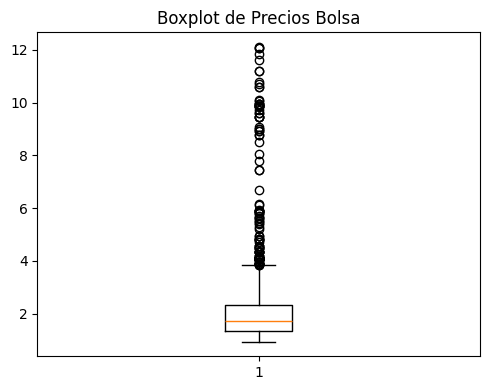

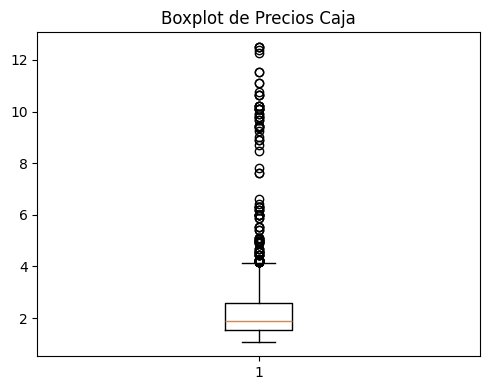

In [20]:
import matplotlib.pyplot as plt
# Boxplots para detectar outliers numéricos de los precios al ser el dato con
# mayor volatilidad
numeric_cols = ['Precios Bolsa','Precios Caja']
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col].dropna().values, vert=True, showfliers=True)
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

In [21]:
#Windsorización
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

In [22]:
df.describe()

,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,mes_sin,mes_cos
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03,1.096000e+03
mean,2023.000912,15.732664,2.006063,2.224203,31.392759,20.379283,71.526345,0.761280,357.398319,0.028285,0.221715,0.163321,0.071168,0.275547,-4.586021e-03,-1.914303e-03
std,0.817055,8.805388,0.883148,0.922270,2.558098,2.780915,4.865972,5.574474,235.801411,0.165861,0.415590,0.369827,0.257222,0.446994,7.061226e-01,7.087168e-01
min,2022.000000,1.000000,0.940000,1.090000,24.200000,14.200000,57.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,2022.000000,8.000000,1.327500,1.520000,29.400000,17.800000,68.900000,0.000000,209.750000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01,-8.660254e-01
50%,2023.000000,16.000000,1.720000,1.900000,31.400000,20.600000,71.526345,0.000000,357.398319,0.000000,0.000000,0.000000,0.000000,0.000000,-2.449294e-16,-1.836970e-16
75%,2024.000000,23.000000,2.330000,2.565000,33.100000,22.600000,74.100000,0.000000,357.398319,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e-01,8.660254e-01
max,2024.000000,31.000000,3.833750,4.132500,38.400000,26.600000,91.600000,94.500000,1354.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


# INGENIERIA DE ATRIBUTOS

In [23]:
#Para nuestro caso al estar manejando muchos factores interconectados es importante
#considerar atributos más avanzados como interacciones (temperaturaxprecitacion)
#y columnas de lag para el caso de temperatura, humedad y precipitaciones
df['Temp_MinxPrecipitacion'] = df['Temp Min']* df['Precipitaciones']
df['Temp_MaxxPrecipitacion'] = df['Temp Max']* df['Precipitaciones']

In [24]:
#columnas lag de temperatura, humedad y precipitaciones
df['Temp_Min_lag10'] = df['Temp Min'].shift(10)
df['Temp_Max_lag10'] = df['Temp Max'].shift(10)
df['Humedad_lag10'] = df['Humedad'].shift(10)
df['Precipitaciones_lag10'] = df['Precipitaciones'].shift(10)

In [25]:
df.head(15)

,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,...,Trimestre_3,Trimestre_4,mes_sin,mes_cos,Temp_MinxPrecipitacion,Temp_MaxxPrecipitacion,Temp_Min_lag10,Temp_Max_lag10,Humedad_lag10,Precipitaciones_lag10
0,2022,1,1.19,1.47,31.7,21.2,71.526345,0.00000,357.398319,0,...,False,False,0.5,0.866025,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2022,2,1.19,1.47,31.9,21.5,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.367524,24.284837,NaN,NaN,NaN,NaN
2,2022,3,1.25,1.58,32.9,21.1,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.063012,25.046118,NaN,NaN,NaN,NaN
3,2022,4,1.22,1.50,32.9,20.0,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,15.225603,25.046118,NaN,NaN,NaN,NaN
4,2022,5,1.22,1.50,32.2,20.6,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,15.682371,24.513221,NaN,NaN,NaN,NaN
5,2022,6,1.25,1.55,31.3,19.2,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,14.616579,23.828069,NaN,NaN,NaN,NaN
6,2022,7,1.25,1.50,31.3,20.0,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,15.225603,23.828069,NaN,NaN,NaN,NaN
7,2022,8,1.25,1.52,33.5,21.4,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.291396,25.502886,NaN,NaN,NaN,NaN
8,2022,9,1.25,1.52,32.0,21.7,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.519780,24.360965,NaN,NaN,NaN,NaN
9,2022,10,1.25,1.55,32.8,20.6,71.526345,0.76128,357.398319,1,...,False,False,0.5,0.866025,15.682371,24.969990,NaN,NaN,NaN,NaN


In [26]:
#eliminamos los registros con NAN para que no hay ningun vacio en el dataset
df = df.dropna()

In [27]:
df.head()

,Año,Día,Precios Bolsa,Precios Caja,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,...,Trimestre_3,Trimestre_4,mes_sin,mes_cos,Temp_MinxPrecipitacion,Temp_MaxxPrecipitacion,Temp_Min_lag10,Temp_Max_lag10,Humedad_lag10,Precipitaciones_lag10
10,2022,11,1.22,1.47,31.9,20.0,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,15.225603,24.284837,21.2,31.7,71.526345,0.00000
11,2022,12,1.22,1.47,31.5,20.2,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,15.377859,23.980325,21.5,31.9,71.526345,0.76128
12,2022,13,1.25,1.58,30.7,21.2,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.139140,23.371301,21.1,32.9,71.526345,0.76128
13,2022,14,1.22,1.58,30.4,22.2,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,16.900420,23.142917,20.0,32.9,71.526345,0.76128
14,2022,15,1.19,1.63,31.2,22.5,71.526345,0.76128,357.398319,0,...,False,False,0.5,0.866025,17.128804,23.751941,20.6,32.2,71.526345,0.76128


# Revision de correlaciones de los datos

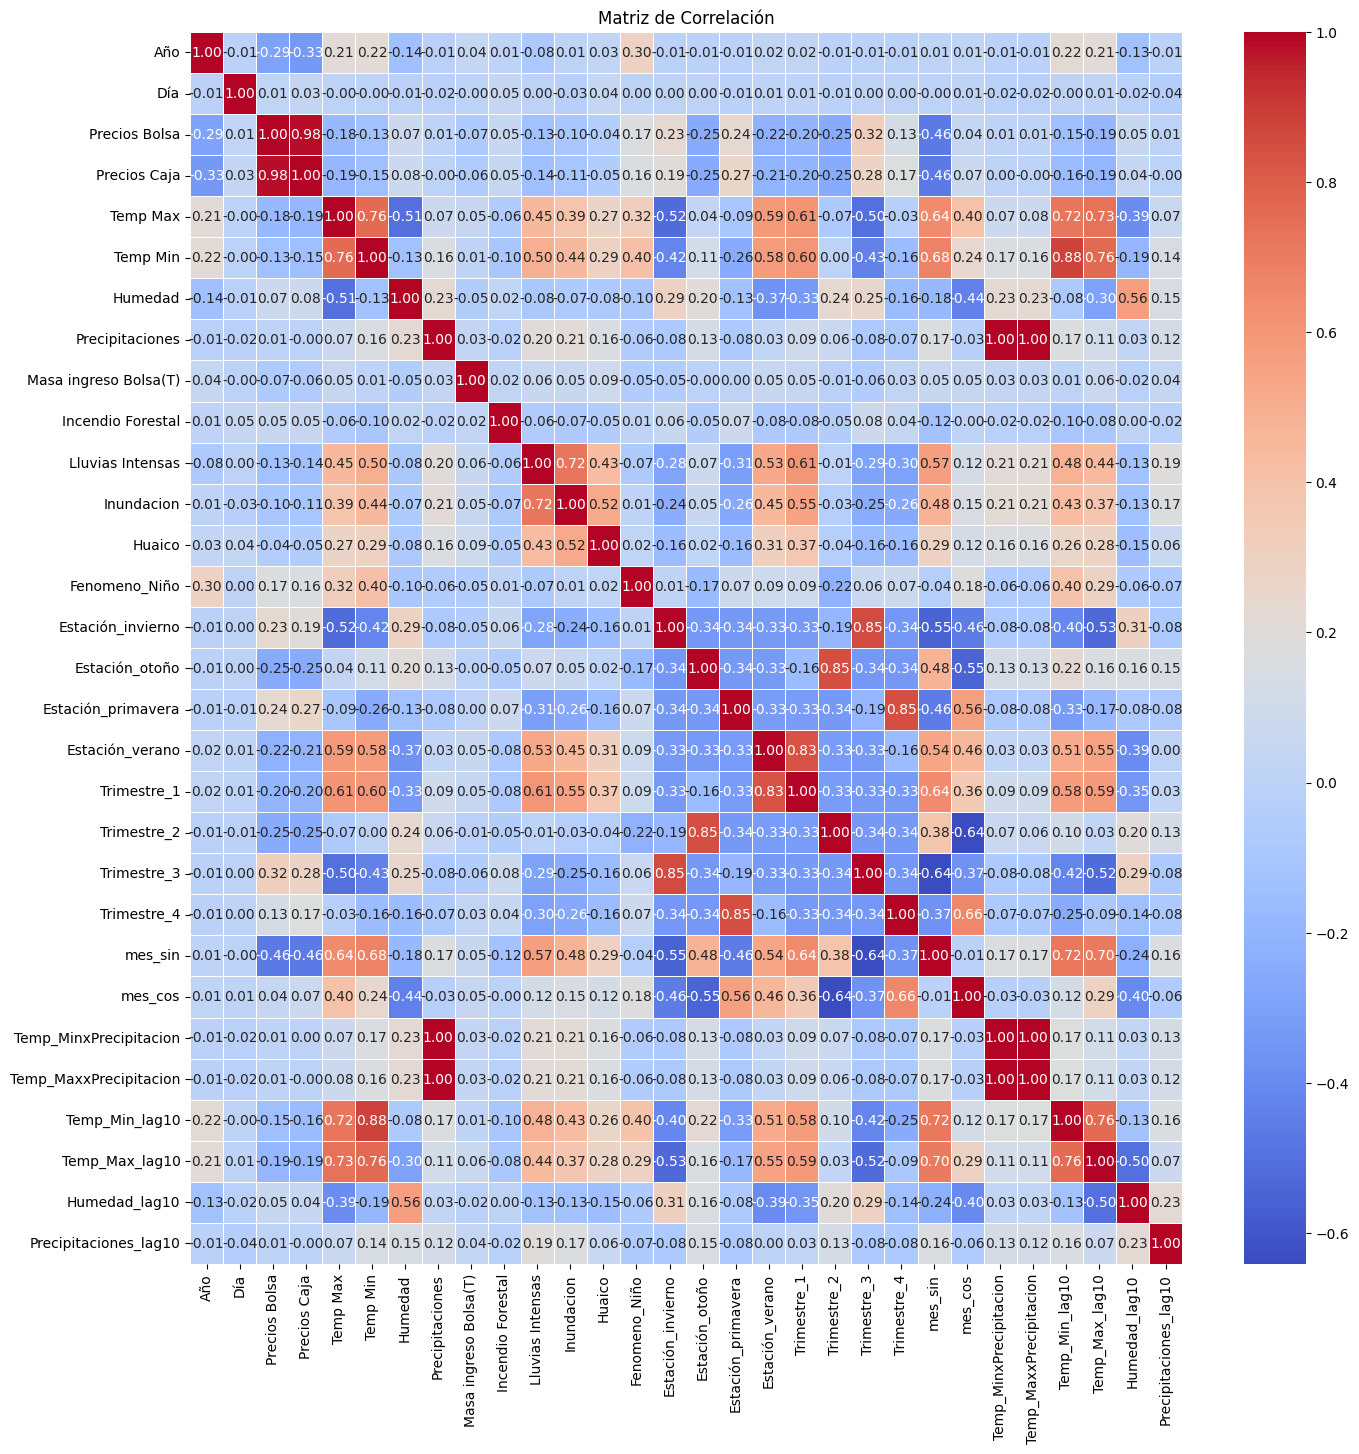

In [28]:
corr_matriz = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(16, 16))  # Tamaño de la figura
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

In [29]:
df.columns

Index(['Año', 'Día', 'Precios Bolsa', 'Precios Caja', 'Temp Max', 'Temp Min',
       'Humedad', 'Precipitaciones', 'Masa ingreso Bolsa(T)',
       'Incendio Forestal', 'Lluvias Intensas', 'Inundacion', 'Huaico',
       'Fenomeno_Niño', 'Estación_invierno', 'Estación_otoño',
       'Estación_primavera', 'Estación_verano', 'Trimestre_1', 'Trimestre_2',
       'Trimestre_3', 'Trimestre_4', 'mes_sin', 'mes_cos',
       'Temp_MinxPrecipitacion', 'Temp_MaxxPrecipitacion', 'Temp_Min_lag10',
       'Temp_Max_lag10', 'Humedad_lag10', 'Precipitaciones_lag10'],
      dtype='object')

In [30]:
# dropea Precios Caja y las 2 variables de interaccion de temperatura y precipitacion
# dado que estas tienen una correlacion de 1
df=df[['Año', 'Día', 'Precios Bolsa', 'Temp Max', 'Temp Min',
       'Humedad', 'Precipitaciones', 'Masa ingreso Bolsa(T)',
       'Incendio Forestal', 'Lluvias Intensas', 'Inundacion', 'Huaico',
       'Fenomeno_Niño', 'Estación_invierno', 'Estación_otoño',
       'Estación_primavera', 'Estación_verano', 'Trimestre_1', 'Trimestre_2',
       'Trimestre_3', 'Trimestre_4', 'mes_sin', 'mes_cos',
      'Temp_Min_lag10',
       'Temp_Max_lag10', 'Humedad_lag10', 'Precipitaciones_lag10']]

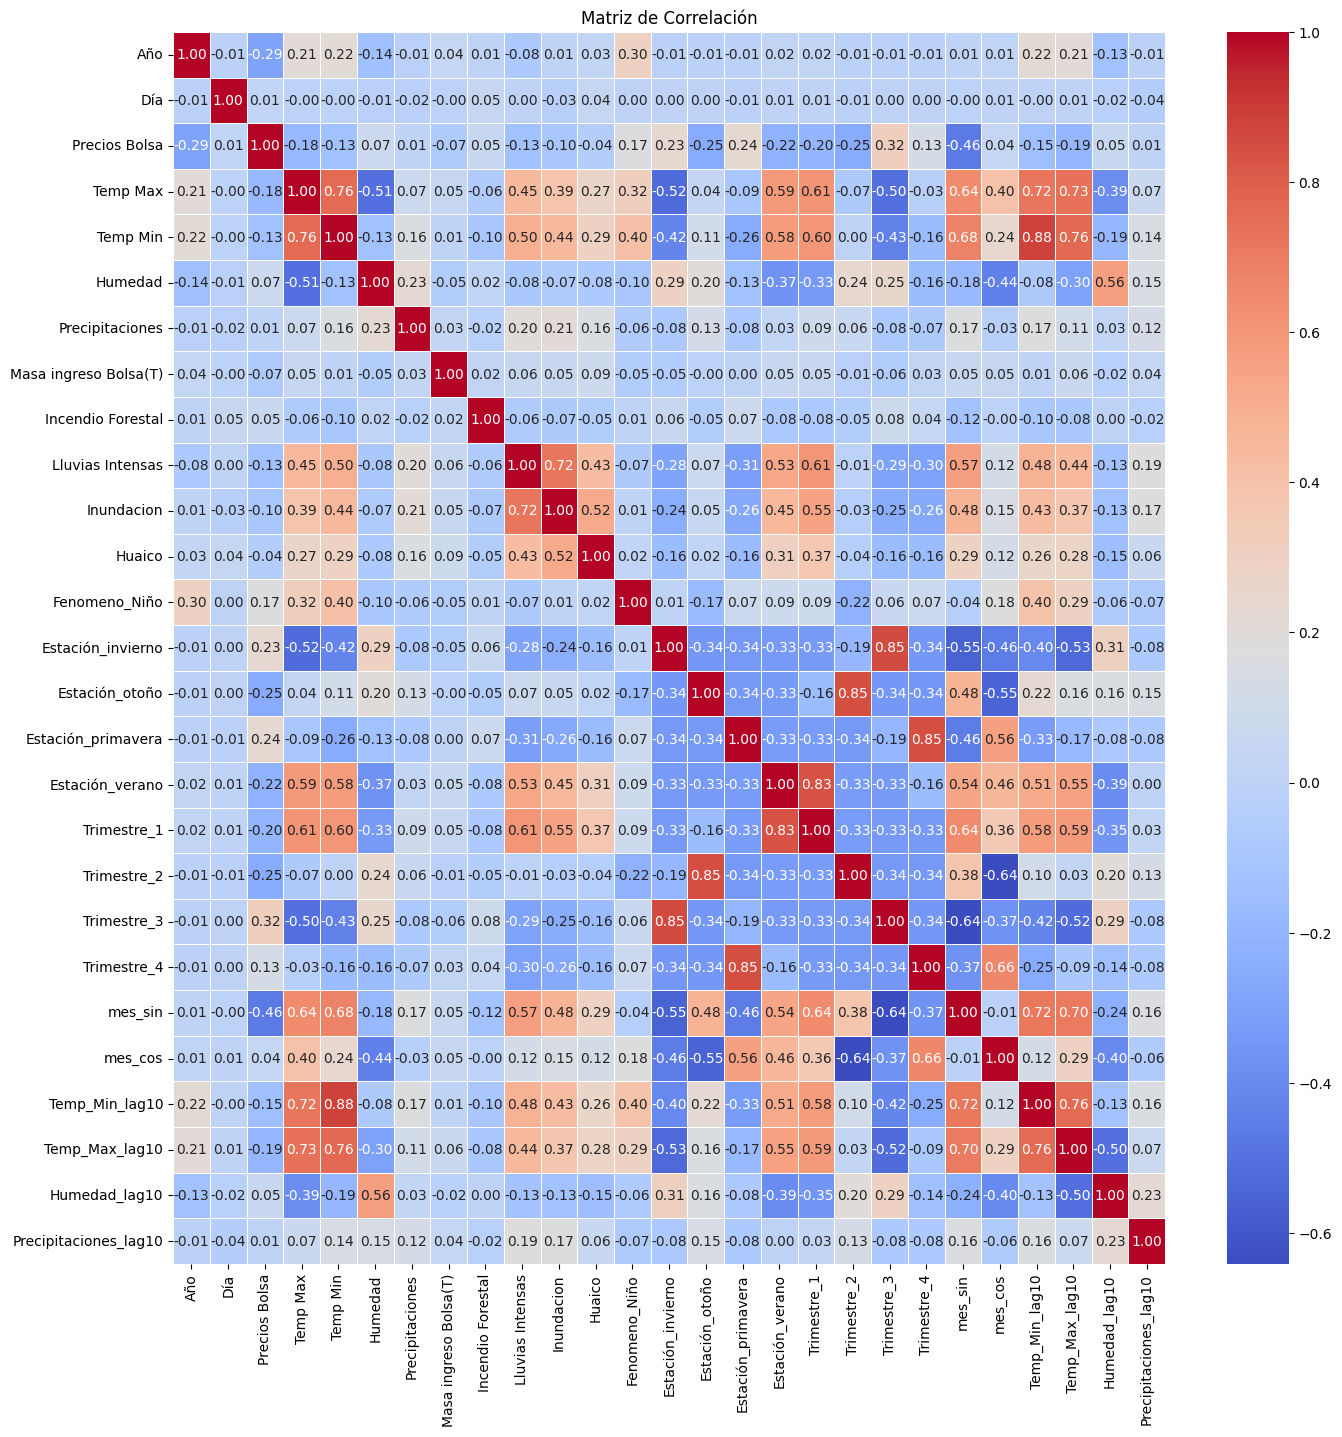

In [31]:
corr_matriz = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(16, 16))  # Tamaño de la figura
sns.heatmap(corr_matriz, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

#SELECCION DE ATRIBUTOS (filter y wrapper)

In [32]:
df.columns

Index(['Año', 'Día', 'Precios Bolsa', 'Temp Max', 'Temp Min', 'Humedad',
       'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
       'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
       'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
       'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
       'Trimestre_4', 'mes_sin', 'mes_cos', 'Temp_Min_lag10', 'Temp_Max_lag10',
       'Humedad_lag10', 'Precipitaciones_lag10'],
      dtype='object')

In [33]:
df.describe()

,Año,Día,Precios Bolsa,Temp Max,Temp Min,Humedad,Precipitaciones,Masa ingreso Bolsa(T),Incendio Forestal,Lluvias Intensas,Inundacion,Huaico,Fenomeno_Niño,mes_sin,mes_cos,Temp_Min_lag10,Temp_Max_lag10,Humedad_lag10,Precipitaciones_lag10
count,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1086.000000,1.086000e+03,1.086000e+03,1086.000000,1086.000000,1086.000000,1086.000000
mean,2023.010129,15.826888,2.013191,31.384865,20.376054,71.526345,0.761981,357.398319,0.027624,0.223757,0.164825,0.071823,0.278085,-9.232302e-03,-9.906381e-03,20.365280,31.386799,71.570694,0.767001
std,0.815116,8.786324,0.884059,2.567631,2.792542,4.888345,5.600056,236.885561,0.163969,0.416953,0.371194,0.258314,0.448262,7.076979e-01,7.070373e-01,2.789356,2.561631,4.848211,5.599638
min,2022.000000,1.000000,0.940000,24.200000,14.200000,57.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,14.200000,24.200000,57.600000,0.000000
25%,2022.000000,8.000000,1.330000,29.400000,17.800000,68.900000,0.000000,202.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.660254e-01,-8.660254e-01,17.800000,29.400000,69.000000,0.000000
50%,2023.000000,16.000000,1.720000,31.400000,20.600000,71.526345,0.000000,357.398319,0.000000,0.000000,0.000000,0.000000,0.000000,-2.449294e-16,-1.836970e-16,20.600000,31.400000,71.526345,0.000000
75%,2024.000000,23.000000,2.330000,33.100000,22.600000,74.100000,0.000000,357.398319,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000e-01,5.000000e-01,22.600000,33.100000,74.100000,0.000000
max,2024.000000,31.000000,3.833750,38.400000,26.600000,91.600000,94.500000,1354.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,26.600000,38.400000,91.600000,94.500000


In [34]:
#hacemos primero el caso del filter
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2, f_classif
#separa los atributos y el target
X = df[['Año', 'Día', 'Precios Bolsa', 'Temp Max', 'Temp Min', 'Humedad',
       'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
       'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
       'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
       'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
       'Trimestre_4', 'mes_sin', 'mes_cos', 'Temp_Min_lag10', 'Temp_Max_lag10',
       'Humedad_lag10', 'Precipitaciones_lag10']]
Y = df['Precios Bolsa']   #target

In [35]:

from sklearn.feature_selection import SelectKBest
fit_selector = SelectKBest(score_func=f_regression, k=10).fit(X, Y)

# muestra resultados de seleccion
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Scores de Atributos: {}".format(fit_selector.scores_))

Atributos Seleccionados: [ 0  2 13 14 15 16 17 18 19 21]
Scores de Atributos: [9.89003234e+01 1.98537635e-01 1.22047550e+17 3.58027644e+01
 1.90236869e+01 6.03343694e+00 6.40127064e-02 4.81632770e+00
 2.91083713e+00 1.92923509e+01 1.01496026e+01 2.05867151e+00
 3.09172763e+01 6.14914269e+01 7.36295147e+01 6.41206572e+01
 5.46276917e+01 4.61891949e+01 7.36007156e+01 1.22594469e+02
 1.88948472e+01 2.96852449e+02 1.61026821e+00 2.35443920e+01
 4.12062888e+01 2.99186335e+00 3.30796295e-02]


In [36]:
#hacemos el caso de wrapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# aplica RFE con algoritmo Logistic Regression como evaluador de atributos. Se le pide los mejores 15 atributos
predictor = Ridge()  # define modelo predictor (regresor logistico)
rfe = RFE(predictor, n_features_to_select=15)    # instancia objeto RFE
fit_selector = rfe.fit(X, Y)    # ejecuta el algoritmo RFE con la data pasada
print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 15
Atributos Seleccionados: [ 0  2  4 10 11 14 15 16 17 18 19 20 21 22 23]
Ranking de Atributos: [ 1 12  1 11  1  5  8 13  9  2  1  1  6 10  1  1  1  1  1  1  1  1  1  1
  4  3  7]


In [37]:
# aplica RFE con algoritmo Logistic Regression como evaluador de atributos. Se le pide los mejores 15 atributos
predictor = Lasso()  # define modelo predictor (regresor logistico)
rfe = RFE(predictor, n_features_to_select=15)    # instancia objeto RFE
fit_selector = rfe.fit(X, Y)    # ejecuta el algoritmo RFE con la data pasada
print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 15
Atributos Seleccionados: [ 7 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Ranking de Atributos: [13 12 11 10  9  8  7  1  6  5  4  3  2  1  1  1  1  1  1  1  1  1  1  1
  1  1  1]


In [38]:
# aplica RFE con algoritmo Logistic Regression como evaluador de atributos. Se le pide los mejores 15 atributos
predictor = RandomForestRegressor()  # define modelo predictor (regresor logistico)
rfe = RFE(predictor, n_features_to_select=15)    # instancia objeto RFE
fit_selector = rfe.fit(X, Y)    # ejecuta el algoritmo RFE con la data pasada
print("Numero de Atributos: {}".format(fit_selector.n_features_))
print("Atributos Seleccionados: {}".format(fit_selector.get_support(indices=True)))
print("Ranking de Atributos: {}".format(fit_selector.ranking_))

Numero de Atributos: 15
Atributos Seleccionados: [ 1  2  3  4  5  7 12 15 20 21 22 23 24 25 26]
Ranking de Atributos: [ 5  1  1  1  1  1 10  1  8  6  7  2  1  4  9  1 12 13 11  3  1  1  1  1
  1  1  1]


In [39]:
#probando el modelo Lasso
X = df[['Masa ingreso Bolsa(T)', 'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
       'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
       'Trimestre_4', 'mes_sin', 'mes_cos', 'Temp_Min_lag10', 'Temp_Max_lag10',
       'Humedad_lag10', 'Precipitaciones_lag10']]

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
vadid_fraction = 0.20    # proporcion de muestras para validacion
seed = 42   # semilla para el generador aleatorio (para reproductibilidad)
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=vadid_fraction, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 868 ejemplos. Validation: 218 ejemplos


In [41]:
from sklearn.model_selection import KFold  # para partir la data en k-folds# Evaluamos cada pipeline de ML en estrategia de 5-fold-CV
# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 75
kfold = KFold( n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 5-folds CV
cv_results = cross_val_score(Lasso(), X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("{}: {} ({})".format('lasso: ', cv_results.mean(), cv_results.std()))


lasso: : -0.7795030293323837 (0.04793804802057675)


In [42]:
# Reentrena modelo de regresion Ridge con todos los datos de entrenamiento y lo prueba en el conjunto de test
from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion
model = Lasso() #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 0.7794746754157663
Mean absolute error: 0.6978260489465975
Explained variance score: 0.0018967639952954807
R2 score: 0.0018962083821822961


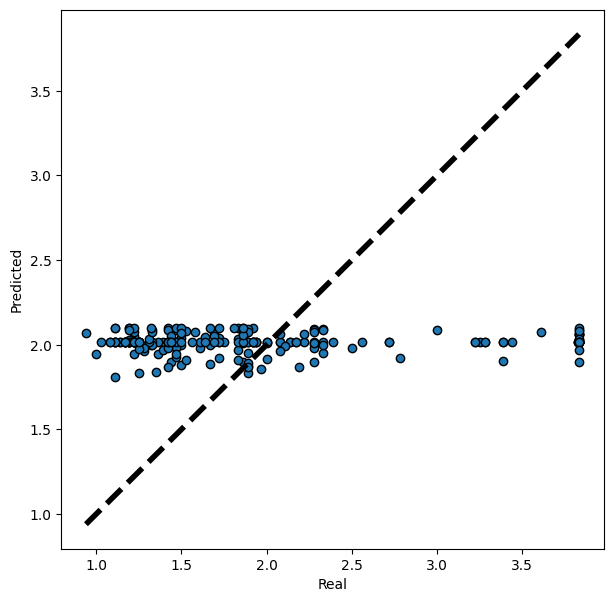

In [43]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

In [44]:
#probando el modelo RandomForest
X = df[['Año', 'Día', 'Precios Bolsa', 'Temp Max', 'Temp Min', 'Humedad',
       'Precipitaciones', 'Masa ingreso Bolsa(T)', 'Incendio Forestal',
       'Lluvias Intensas', 'Inundacion', 'Huaico', 'Fenomeno_Niño',
       'Estación_invierno', 'Estación_otoño', 'Estación_primavera',
       'Estación_verano', 'Trimestre_1', 'Trimestre_2', 'Trimestre_3',
       'Trimestre_4', 'mes_sin', 'mes_cos', 'Temp_Min_lag10', 'Temp_Max_lag10',
       'Humedad_lag10', 'Precipitaciones_lag10']]

In [45]:
vadid_fraction = 0.20    # proporcion de muestras para validacion
seed = 6   # semilla para el generador aleatorio (para reproductibilidad)
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=vadid_fraction, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 868 ejemplos. Validation: 218 ejemplos


In [46]:
# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 89
kfold = KFold( n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 5-folds CV
cv_results = cross_val_score(RandomForestRegressor() , X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
print("{}: {} ({})".format('Random Forest: ', cv_results.mean(), cv_results.std()))


Random Forest: : -3.6520800202006656e-05 (2.540070908724741e-05)


In [47]:
model = RandomForestRegressor()  #  usar class_weight = 'balanced') para entrenar tomando en cuenta el desbalance
model.fit(X_train, y_train)

# predice el target en el conjunto de test
y_predicted = model.predict(X_valid)
print("Mean squared error:", mean_squared_error(y_valid, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_valid, y_predicted))
print("Explained variance score:", explained_variance_score(y_valid, y_predicted))
print("R2 score:", r2_score(y_valid, y_predicted))

Mean squared error: 2.4909286451991963e-05
Mean absolute error: 0.001765395694615878
Explained variance score: 0.9999688054141477
R2 score: 0.9999687737077961


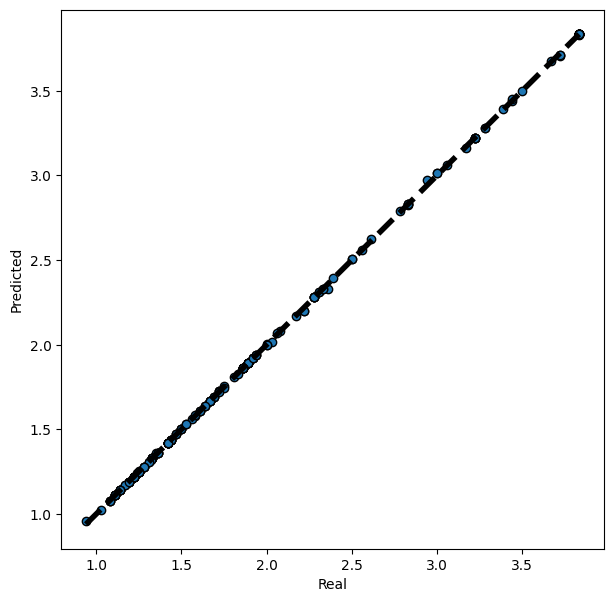

In [48]:
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_valid, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()